In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Frequentist Interval Estimation via Neyman Construction

<p style="font-size: 16px; max-width: 500px;">
The goal of <emph>interval estimation</emph> in frequentist inference is the construction of intervals from observed data with definite statistical properties. Since the data is the result of a stochastic process, the intervals are also stochastic objects. This is similar to how a maximum-likelihood estimate, which is also constructed from the observed data is a random object.
</p>

### Coverage of parameter values

<p style="font-size: 16px; max-width: 500px;">
An important property of an interval $y$ constructed from data $x$ $y = (x) = [a,b]$ is whether a given parameter value is within the interval bounds in which case we say the interval "covers" the value.
</p>
<p style="font-size: 16px; max-width: 500px;">
Given an ensemble of data $x \sim p(x|\mu)$ an interesting number is the number of intervals (one constructed from each draw $x$) which cover the parameter value from which the data originated -- this is the coverage of $\mu$.
</p>
<p style="font-size: 16px; max-width: 500px;">
In interval estimation the goal is to find a procedure to such intervals that yields a known coverage value. A tyical example are $95\%$ confidence intervals, where the probability of observing data, whose corresponding interval covers the true value of the underlying parameter is 95%.
</p>

### Neyman Construction - Intervals from a series of hypothesis tests
<p style="font-size: 16px; max-width: 500px;">
To construct intervals for  $x$, we need to decide whether a given value $\mu$ is inside the $x$'s interval, i.e. we need a map
$$(x,\mu) \to \{\text{in interval},\text{out of internal}\} $$
This is nothing but a hypothesis test, in which for some $\mu$ we either decide for a given $x$ whether to accept or reject the model with pararmeter $\mu$
$$(x,\mu) \to \{\text{accept},\text{reject}\} $$
<br/>
In both cases it's a map $(x,\mu) \to \{\text{yes},\text{no}\}$!. This means that given a hypothesis testing procedure, we can construct intervals of $x$ by defining it as the union of all parameter values for which the hypothesis is not rejected based on the observation of $x$.
The coverage follows directly: if for data $x~p(x|mu)$
Given a model $p(x|\mu)$ the set of x-value which case the hypothesis $\mu$ to be accepted by constuction also have assoociated intervals in which $\mu$ is included. If 95% of values $x$ cause the model to be accepted, that immediatly implies 95% of intervals include $\mu$.
</p>


<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-319-62840-0_7/MediaObjects/334206_2_En_7_Fig1_HTML.gif"/>

(image from https://link.springer.com/chapter/10.1007/978-3-319-62840-0_7)

### Right-tail Hypothesis Tests

<p style="font-size: 16px; max-width: 500px;">
Let's look at a few ways to do hypothesis tests (and thus construct intervals). As usual we will conduct hypothesis tests for a given parameter $\mu$ by defining a test statistic  $t_\mu(x)$
</p>

<p style="font-size: 16px; max-width: 500px;">
$$t_\mu(x) = -2\log\frac{L(\mu,\hat{\hat{\theta}}|x)}{L(\hat{\mu},\hat{\theta}|x)}$$
</p>

#### Asymptotic Behavior of the Profile Likelhoood (Wald)

<p style="font-size: 16px; max-width: 500px;">
Asymptotically, the $t_\mu(x)$ can be put into relation to the best-fit value $\hat{\mu}(x)$. Maximum likelhood estimates are asymptotically normal. Meaning that they are normally distributed around the true value of parameter
</br>
$$\mu \sim N(\mu',\sigma)$$
</br>
and this relation holds
</br>
$$t_\mu = \frac{(\mu-\hat\mu)^2}{\sigma^2}$$
</br>
We can look at those two distributions change into each other by loooking at a joint plot (we'll assume $\sigma=1$ for now)
</p>

In [2]:
def tmu_teststat(mu,muhat,sigma):
    a = (mu-muhat)**2/sigma**2
    return a

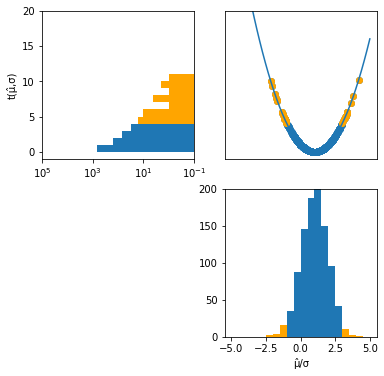

In [3]:
from utils import *
jointplot(mu = 1.0,sigma = 1.0,teststat = tmu_teststat)

<p style="font-size: 16px; max-width: 500px;">
Assuming the asymptotic normality we assume $\hat{\mu} = \mathcal{N}(\mu',\sigma)$ the normal distribution changes into a $\chi^2$ distribution  (the distribution of squares of normally distributed random numbers is a $\chi^2$ distribution)
</p>

<p style="font-size: 16px; max-width: 500px;">
There are several important variation to this basic test statistic:
<br/>
For models in which the parameter we want to hypothesis tests on is bounded $\mu >= 0$ we use
<br/>
$$
\tilde{t}_\mu(x)=
\begin{cases}
-2\log\frac{L(\mu,\hat{\hat{\theta}}|x)}{L(\hat{\mu},\hat{\theta}|x)}\;\text{if}\;\hat{\mu}>=0\\ 
-2\log\frac{L(\mu,\hat{\hat{\theta}}|x)}{L(0,\hat{\theta}|x)}\;\text{if}\;\hat{\mu}<0
\end{cases}
$$
<br/>
Using the asymptotic approximation and $-2\log\frac{L(\mu,\hat{\hat{\theta}}|x)}{L(0,\hat{\theta}|x)} = -2\log\frac{L(\mu,\hat{\hat{\theta}}|x)}{L(\hat{\mu},\hat{\theta}|x)} - (-2\log\frac{L(0,\hat{\hat{\theta}}|x)}{L(\hat{\mu},\hat{\theta}|x)})$
<br/>
we get
<br/>
$$
\tilde{t}_\mu(x)=
\begin{cases}
\frac{(\mu-\hat\mu)^2}{\sigma^2}\;\text{if}\;\hat{\mu}>=0\\ 
\frac{(\mu-\hat\mu)^2}{\sigma^2} - \frac{(0-\hat\mu)^2}{\sigma^2} = \frac{(\mu-\hat\mu)^2-\hat\mu^2}{\sigma^2}\;\text{if}\;\hat{\mu}<0
\end{cases}
$$
</p>


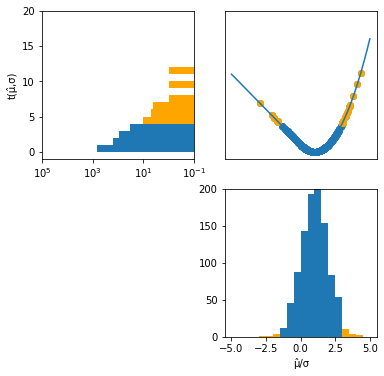

In [4]:
def tmu_tilde_teststat(mu,muhat,sigma):
    a = tmu_teststat(mu,muhat,sigma)

    b = (0-muhat)**2/sigma**2
    r = np.where(muhat<0,a-b,a)
    return r

jointplot(mu = 1.0,sigma = 1.0,teststat = tmu_tilde_teststat)

<p style="font-size: 16px; max-width: 500px;">
In both of the above test statistics, deviation into both the positive and negative direction from the true value of the parameter $\mu$, $\mu'$ result in a large value of the test statistic. That is, having data  too far from $\mu'$ in either direction may lead to that hypothesis being rejected. However in certain cases, one would like to penalize only a one direction and not the other.
<br/>
<br/>
E.g. when the parameter of interest is a signal strength relating to a new physics process, the fact that the date produces a MLE estimate <i>larger</i> than the hypothesis being tested, should not count against the hypothesis.
<br/>
<br/>
$$
q_\mu(x)=
\begin{cases}
t_\mu(x)\;\text{if}\;\hat{\mu}<=\mu\\ 
0\;\text{if}\;\hat{\mu}>\mu
\end{cases}
$$
</p>

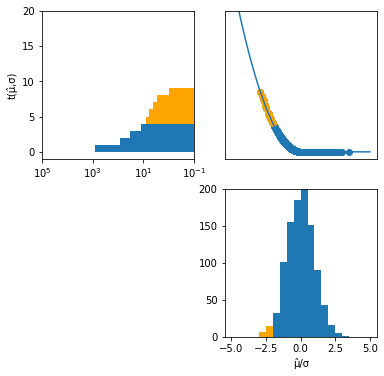

In [5]:
def qmu_teststat(mu,muhat,sigma):
    r = tmu_teststat(mu,muhat,sigma)
    zero = np.zeros_like(r)
    r = np.where(muhat>mu,zero,r)
    return r

jointplot(mu = 0.0,sigma = 1.0,teststat = qmu_teststat)

<p style="font-size: 16px; max-width: 500px;">
The same procedure can be applied to bounded pararmeters $\mu>0$
<br/>
<br/>
$$
\tilde{q}_\mu(x)=
\begin{cases}
\tilde{t}_\mu(x)\;\text{if}\;\hat{\mu}<=\mu\\ 
0\;\text{if}\;\hat{\mu}>\mu
\end{cases}
$$
</p>

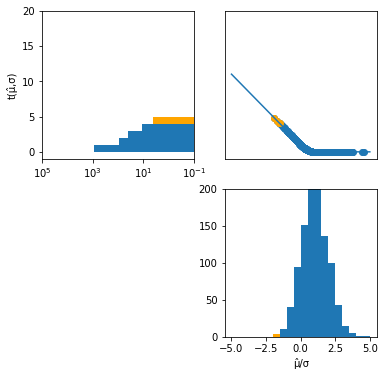

In [6]:
def qmu_tilde_teststat(mu,muhat,sigma):
    r = tmu_tilde_teststat(mu,muhat,sigma)
    zero = np.zeros_like(r)
    r = np.where(muhat>mu,zero,r)
    return r

jointplot(1.0,sigma = 1.0,teststat = qmu_tilde_teststat)

In [7]:
sigma = 1.0
test_size = 0.05
min_mu,max_mu,myteststat = 0,5, tmu_tilde_teststat
# min_mu,max_mu,myteststat = 0,5, qmu_tilde_teststat 
# min_mu,max_mu,myteststat = -5,5, tmu_teststat
# min_mu,max_mu,myteststat = -5,5, qmu_teststat
hypos_over_sigma = np.linspace(min_mu,max_mu,50)
scans = np.array([scan_tests_for_size(h*sigma,sigma = sigma,teststat = myteststat) for h in hypos_over_sigma])
cuts  = np.argmax(scans[:,:,-1] > test_size,axis=1)
atcut = np.asarray([s[c] for s,c in zip(scans,cuts)])

<p style="font-size: 16px; max-width: 500px;">
Let's look at the test statistic for varous values of the parameter of the model $\mu$. It's useful to plot it with respect to two x-axes. Once as a function of $\hat\mu$ and once as a function of $\hat\mu-\mu$. In the second case the minimum of the test statistic curve is always at the origin.
</p>

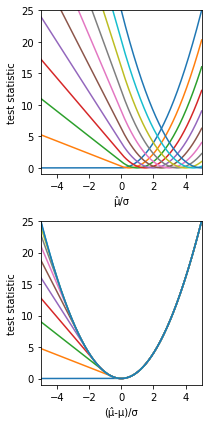

In [8]:
f = plot_teststat(min_mu,sigma = sigma, teststat = myteststat)
f.set_size_inches(3,6)
f.set_tight_layout(True)

<p style="font-size: 16px; max-width: 500px;">
We can now look at each hypothesis and find the values for $\hat\mu$, for which the hypothesis would be rejected as follows.
</p>

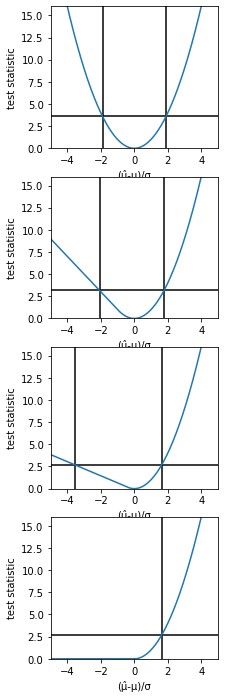

In [9]:
f,axarr = plt.subplots(4,1)
plot_oneinterval(axarr[0],10.0,sigma,test_size,myteststat)
plot_oneinterval(axarr[1],1.0,sigma,test_size,myteststat)
plot_oneinterval(axarr[2],0.4,sigma,test_size,myteststat)
plot_oneinterval(axarr[3],0.0,sigma,test_size,myteststat)
f.set_size_inches(3,12)

<p style="font-size: 16px; max-width: 500px;">
Armed with core to get the 95% hypothesis bounds for each hypothesis, we can construct the "Neyman band". We can do this in both spaces. e.g.

* in the $(\hat\mu-\mu)/\sigma$ space
* in the $\hat{\mu}/\sigma$ space

we can also overlay a few representative $\hat{\mu}$ values to get a feel for the "expected" intervals that result from this construction

Customary values are $\hat{\mu}/\sigma = -2,-1,0,1,2$
</p>

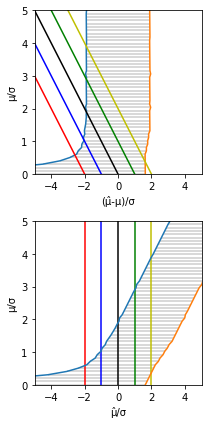

In [10]:
f,axarr = plt.subplots(2,1)
plot_neyman_construction(axarr[0],min_mu,max_mu,hypos_over_sigma,atcut,delta = True)
plot_neyman_construction(axarr[1],min_mu,max_mu,hypos_over_sigma,atcut,delta = False)
f.set_size_inches(3,6)
f.set_tight_layout(True)

For the $\tilde{t}_\mu$ test statistic the constucted band in the $\hat\mu/\sigma$ space is the Feldman-Cousins band that smoothly changes from upper limits to two-sided intervals.

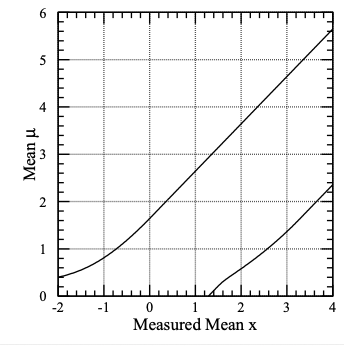
(from https://arxiv.org/pdf/physics/9711021.pdf)

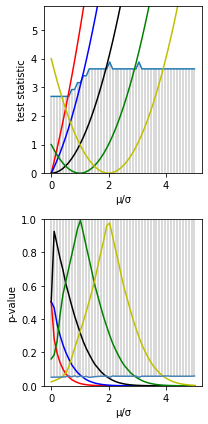

In [11]:
f,axarr = plt.subplots(2,1)
plot_cuts(axarr[0],hypos_over_sigma,atcut,sigma,myteststat)
plot_pvalue(axarr[1],hypos_over_sigma,scans,sigma,myteststat,atcut[:,0])
f.set_size_inches(3,6)
f.set_tight_layout(True)

<p style="font-size: 16px; max-width: 500px;">
As expected, the test statistic becomes minimal (i.e. zero) when the hypothesis matches the best-fit value (or at $\mu$=0 for if $\hat\mu < 0$ and a bounded model) . Equally, the p-value becomes maximal (i.e. unity) in this case. For bounded test statistics, and one-sided test statistics the maximal p-value may change. E.g. for $\mu=0$ a bounded model induces a delta function at vanishing test statistic leading to a maximal p-value of $0.5$
</p>